In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.dpi":1200})
sns.set_context('notebook')
sns.set_style("ticks")
mpl.style.use('default')
mpl.rcParams['axes.linewidth'] = 7 #set the value globally
mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 7
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 7
mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 7
mpl.rcParams['ytick.labelsize'] = 50
mpl.rcParams['xtick.labelsize'] = 50
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 7
mpl.rcParams['font.size'] = 55
mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams['mathtext.it'] = 'Arial'
mpl.rcParams['mathtext.bf'] = 'Arial:bold'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')

# Setting seaborn context and style
sns.set(rc={"figure.dpi":1200})
sns.set_context('notebook')
sns.set_style("ticks")

# Setting matplotlib style
mpl.style.use('default')

# Update rcParams for global consistency
mpl.rcParams.update({
    'axes.linewidth': 2,       # Line width for axes
    'xtick.major.size': 5,     # Major tick size
    'xtick.major.width': 2,    # Major tick width
    'xtick.minor.size': 3,     # Minor tick size
    'xtick.minor.width': 1,    # Minor tick width
    'ytick.major.size': 5,     # Major tick size
    'ytick.major.width': 2,    # Major tick width
    'ytick.minor.size': 3,     # Minor tick size
    'ytick.minor.width': 1,    # Minor tick width
    'ytick.labelsize': 14,     # Label size for y ticks
    'xtick.labelsize': 14,     # Label size for x ticks
    'font.size': 14,           # Font size for text
    'font.sans-serif': 'Arial',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'lines.linewidth': 2,      # Line width for all lines
    'scatter.marker': 'o',     # Default marker for scatter
    'lines.markersize': 8,     # Marker size for scatter
    'axes.titlesize': 16,      # Title size
    'axes.labelsize': 14,      # Label size for axes
    'legend.fontsize': 14      # Font size for legends
})


In [12]:
###IMPORT DATAFRAME###
df = pd.read_csv('OSMOTIC_PERTURBATIONS_MASTER_HIF1A_CITED2_CONCATENATED.csv')
###Drop any rows where 'protein' is 'HIF1A'####
df = df[df['protein'] != 'CITED2']###

df = df[df['D/A_corr_before']<6]
df = df[df['area_before']<650]
df = df[df['D_before']>500]
df = df[df['directA_before']<10000]
df = df[df['directA_before']>3162]
df = df[(df['d_directA']<1200)]
# Group by 'ID' and get 'well' value counts for each group
grouped_well_counts = df.groupby('IDR')['well'].value_counts()

# Convert the Series to a DataFrame for easier filtering
grouped_well_counts = grouped_well_counts.reset_index(name='count')

# Identify 'ID' and 'well' pairs with a count of 30 or more
valid_wells = grouped_well_counts[grouped_well_counts['count'] >= 30]

# Merge the valid_wells DataFrame back with the original df to filter it
# Only keep rows from df that have 'ID' and 'well' combinations appearing in valid_wells
df_filtered = df.merge(valid_wells[['IDR', 'well']], on=['IDR', 'well'])

# The df_filtered now contains only the rows from the original df where the 'well' count per 'ID' is 30 or more
df=df_filtered
# TableS3 = TableS3[TableS3['D/A_before']<6]
# TableS3 = TableS3[TableS3['Area']<650]
# TableS3 = TableS3[TableS3['ch1']>3000]
# TableS3 = TableS3[TableS3['ch3']<10000]
# sliced = TableS3[(TableS3.construct==prot)&(abs(TableS3['ch7']-TableS3['ch3'])<2000)]

In [13]:
# Calculate median 'delta Ef' for each 'replicate' of each 'condition' for each 'mut name'
df_median = df.groupby(['mut name', 'condition', 'well'])['delta Ef'].median().reset_index()

# Rename 'delta Ef' column to 'median delta Ef'
df_median.rename(columns={'delta Ef': 'median delta Ef'}, inplace=True)

# Calculate standard deviation of 'median delta Ef' for each 'condition' for each 'mut name'
df_std = df_median.groupby(['mut name', 'condition'])['median delta Ef'].std().reset_index()

# Rename 'median delta Ef' column to 'std dev delta Ef'
df_std.rename(columns={'median delta Ef': 'std dev delta Ef'}, inplace=True)

# Merge df_median and df_std
df_final = pd.merge(df_median, df_std, on=['mut name', 'condition'], how='left')

# Print the final DataFrame
#print(df_final)

# Calculate average 'median delta Ef' for each 'condition' for each 'mut name'
df_mean = df_final.groupby(['mut name', 'condition'])['median delta Ef'].mean().reset_index()

# Rename 'median delta Ef' column to 'average median delta Ef'
df_mean.rename(columns={'median delta Ef': 'average median delta Ef'}, inplace=True)

# Calculate standard deviation of 'average median delta Ef' for each 'condition' for each 'mut name'
df_std = df_final.groupby(['mut name', 'condition'])['median delta Ef'].std().reset_index()

# Rename 'median delta Ef' column to 'std dev average median delta Ef'
df_std.rename(columns={'median delta Ef': 'std dev average median delta Ef'}, inplace=True)

# Merge df_mean and df_std
df_final_avg = pd.merge(df_mean, df_std, on=['mut name', 'condition'], how='left')

# Print the final DataFrame
print(df_final_avg)
df_final_avg

   mut name  condition  average median delta Ef  \
0      GS24        100                -0.001024   
1      GS24        300                -0.001496   
2      GS24        750                 0.020948   
3      MA>W        100                 0.002056   
4      MA>W        300                -0.001687   
5      MA>W        750                -0.004767   
6      NQ>W        750                -0.007861   
7      RK>D        100                 0.010931   
8      RK>D        300                -0.001778   
9      RK>D        750                 0.023148   
10     RK>E        100                 0.019156   
11     RK>E        300                -0.005701   
12     RK>E        750                 0.010503   
13       WT        100                 0.004184   
14       WT        300                -0.002039   
15       WT        750                 0.020050   

    std dev average median delta Ef  
0                          0.005746  
1                          0.001153  
2                 

,mut name,condition,average median delta Ef,std dev average median delta Ef
0,GS24,100,-0.001024,0.005746
1,GS24,300,-0.001496,0.001153
2,GS24,750,0.020948,0.008188
3,MA>W,100,0.002056,0.002493
4,MA>W,300,-0.001687,0.001624
5,MA>W,750,-0.004767,0.010611
6,NQ>W,750,-0.007861,0.002714
7,RK>D,100,0.010931,0.004396
8,RK>D,300,-0.001778,0.001181
9,RK>D,750,0.023148,0.006038


In [14]:
# Filter df_final_avg for 'condition' 750 and 100
df_750 = df_final_avg[df_final_avg['condition'] == 750]
df_100 = df_final_avg[df_final_avg['condition'] == 100]

# Set 'mut name' as the index for easy subtraction
df_750.set_index('mut name', inplace=True)
df_100.set_index('mut name', inplace=True)
##says df_diff but it's actually the sum for total sensitivity
df_diff = (df_750['average median delta Ef']).abs() + (df_100['average median delta Ef']).abs()

# Calculate the propagated standard error
df_error = (df_750['std dev average median delta Ef']**2 + df_100['std dev average median delta Ef']**2)**0.5

# Create the sensitivity DataFrame
sensitivity = pd.DataFrame({'absolute difference': df_diff, 'propagated_SE': df_error})

# Reset the index
sensitivity.reset_index(inplace=True)

# Print the sensitivity DataFrame
print(sensitivity)


  mut name  absolute difference  propagated_SE
0     GS24             0.021972       0.010003
1     MA>W             0.006823       0.010900
2     NQ>W                  NaN            NaN
3     RK>D             0.034080       0.007469
4     RK>E             0.029660       0.011845
5       WT             0.024234       0.012860


In [15]:
# Add '_HIF1A' after each 'mut name', except for 'GS24'
sensitivity['mut name'] = sensitivity['mut name'].apply(lambda x: x + '_HIF1A' if x != 'GS24' else x)


# Save the updated DataFrame to a CSV file
sensitivity.to_csv('HIF1A_sensitivity.csv', index=False)

# Display the updated DataFrame
print(sensitivity)

     mut name  absolute difference  propagated_SE
0        GS24             0.021972       0.010003
1  MA>W_HIF1A             0.006823       0.010900
2  NQ>W_HIF1A                  NaN            NaN
3  RK>D_HIF1A             0.034080       0.007469
4  RK>E_HIF1A             0.029660       0.011845
5    WT_HIF1A             0.024234       0.012860


In [16]:
# Define your desired order
order = ['NQ>W', 'MA>W', 'WT', 'RK>E', 'RK>D', 'GS24']

# Reorder the dataframe according to the desired order
sensitivity = sensitivity.set_index('mut name').loc[order].reset_index()

# Create a figure and a subplots axis
fig, ax = plt.subplots(figsize=(20,12))

# Generate the bar plot with error bars
ax.bar(sensitivity['mut name'], sensitivity['absolute difference'], 
       yerr=sensitivity['propagated_SE'], color='purple', align='center', alpha=0.5, ecolor='black', capsize=10,error_kw={'elinewidth':4.5})
ax.tick_params(axis='x',rotation=45)  # Change 'labelsize' to your desired font size
ax.set_ylim(bottom=0, top=0.07)  # Replace 'your_upper_limit' with the maximum value you want for the y-axis.

# Add labels and title
plt.xlabel('Mutant')
plt.ylabel('Sensitivity')


# Display the plot
plt.show()


KeyError: "['NQ>W', 'MA>W', 'WT', 'RK>E', 'RK>D'] not in index"

In [7]:
##IMPORT ACTIVITY
activity = pd.read_csv('Shahar_ADvariants_20211203.csv')
activity = activity[activity['ID'].isin([1, 2, 3, 4, 5])]
activity = activity.drop(columns=['norm_error','start','end'])
activity= activity.rename(columns={'MutName': 'mut name'})
activity['Activity_Mean_MSS18'] = activity['Activity_Mean_MSS18'] - 2000
activity['mut name'] = activity['mut name'].replace('supercharge6', 'RK>E')

wt_value = activity.loc[activity['mut name'] == 'WT', 'Activity_Mean_MSS18'].iloc[0]

# Create a new column 'normalized activity' by dividing 'Activity_Mean_MSS18' by the WT value
activity['normalized activity'] = activity['Activity_Mean_MSS18'] / wt_value
# Find the standard deviation value for the 'WT' mut name
wt_std = activity[activity['mut name'] == 'WT']['Activity_std_MSS18'].iloc[0]

# Calculate the normalized error
activity['normalized error'] = ((activity['Activity_std_MSS18'] / activity['Activity_Mean_MSS18'])**2 + 
                                (wt_std / wt_value)**2)**0.5 * activity['normalized activity']

activity

,ID,Gene,ADseq,Activity_Mean_MSS18,Activity_std_MSS18,mut name,normalized activity,normalized error
0,1,Hif1-AD2_46,RLLGWSMDESGLPWLTSYDCEVWAPIWGSRWLLWGEELLRALDWVW,103.122677,576.329705,NQ>W,0.148193,0.830047
1,2,Hif1-AD2_46,RLLGQSWDESGLPQLTSYDCEVNWPIQGSRNLLQGEELLRWLDQVN,111.794463,189.483389,MA>W,0.160655,0.278762
2,3,Hif1-AD2_46,RLLGQSMDESGLPQLTSYDCEVNAPIQGSRNLLQGEELLRALDQVN,695.866145,258.490579,WT,1.000000,0.525332
3,4,Hif1-AD2_46,ELLGQSMDESGLPQLTSYDCEVNAPIQGSEFLLQGEELLDALDQVN,2746.673271,996.520233,RK>E,3.947129,2.049537
4,5,Hif1-AD2_46,DLLGQSMDESGLPQLTSYDCEVNAPIQGSDNLLQGEELLDALDQVN,2858.260837,808.684618,RK>D,4.107487,1.917962


In [8]:
sensitivity = sensitivity[sensitivity['mut name'] != 'GS24']
sensitivity

,mut name,absolute difference,propagated_SE
0,NQ>W,NaN,NaN
1,MA>W,0.006823,0.010900
2,WT,0.024234,0.012860
3,RK>E,0.029660,0.011845
4,RK>D,0.034080,0.007469


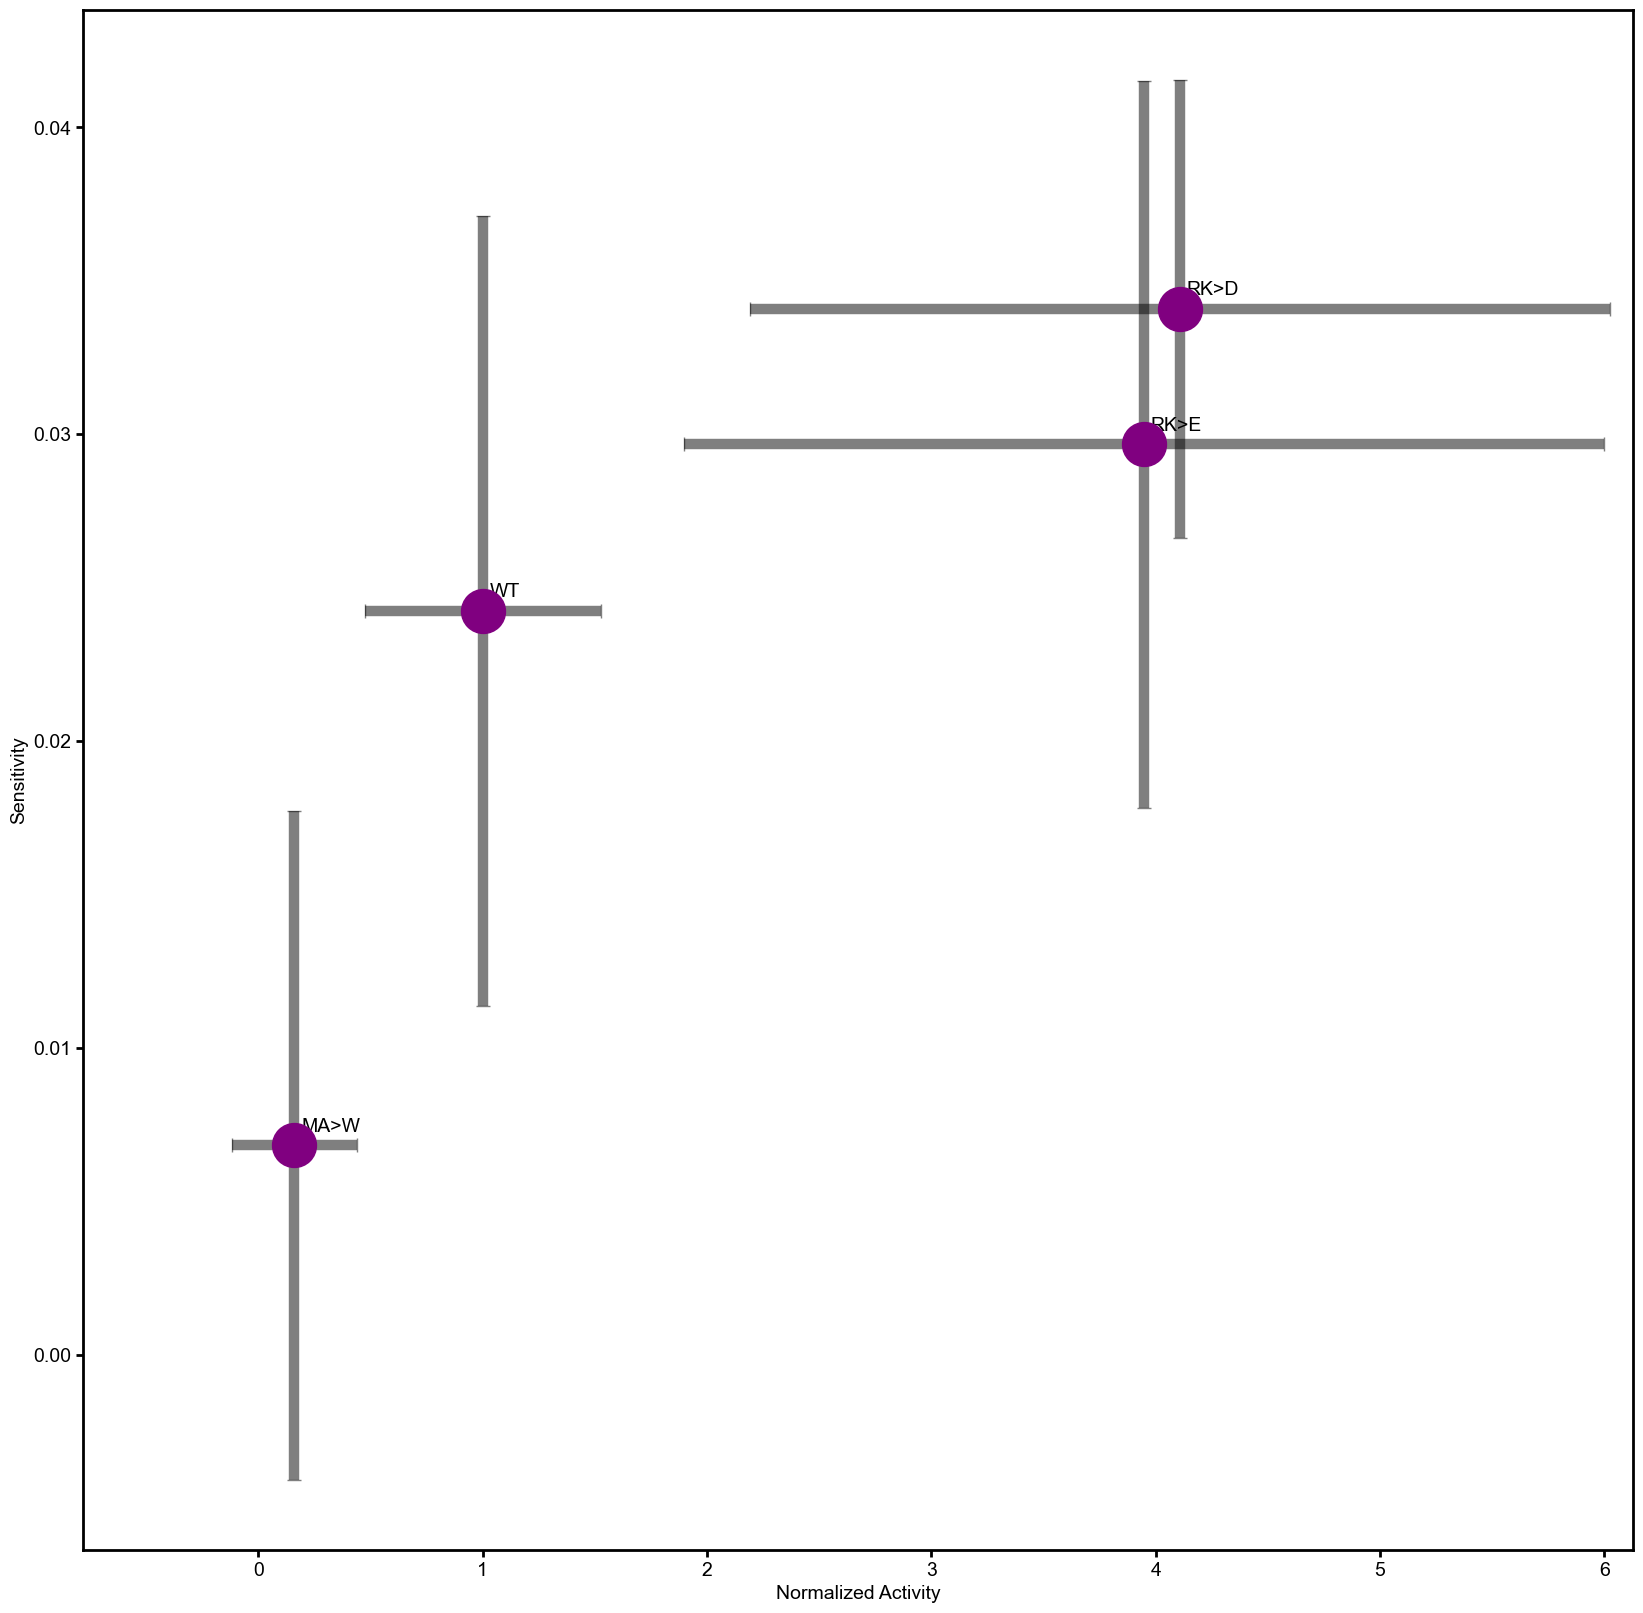

In [9]:

# Let's correct the alignment issue and apply the color and size specifications to the error bars and scatter points.

# Assuming 'sensitivity' and 'activity' DataFrames are defined and 'GS24' has been removed from 'sensitivity'
# We will align the activity DataFrame to match the sensitivity DataFrame
activity_aligned = activity[activity['mut name'].isin(sensitivity['mut name'])].reset_index(drop=True)


# Create a figure and a subplots axis
fig, ax = plt.subplots(figsize=(20,20))

# Generate the scatter plot with error bars
# Note that we need to set the 'ecolor' as a single value if we want to apply alpha
# Therefore, we'll plot the error bars in two steps to have them in different colors
# First plot the y-error (vertical) with the specified alpha
ax.errorbar(activity_aligned['normalized activity'], sensitivity['absolute difference'],
            yerr=sensitivity['propagated_SE'], fmt='o', color='black', alpha=0.5,
            ecolor='black', elinewidth=7.5, capsize=5)

# Then plot the x-error (horizontal) without alpha
ax.errorbar(activity_aligned['normalized activity'], sensitivity['absolute difference'],
            xerr=activity_aligned['normalized error'], fmt='o', color='black',
            ecolor='black', elinewidth=7.5, capsize=5, alpha=0.5)

# Increase the size of the scatter points
ax.scatter(activity_aligned['normalized activity'], sensitivity['absolute difference'],
           color='purple', s=1000, zorder=4)  # `s` is the size of the scatter point

# Label each scatter point with its 'mut name'
for i in range(len(activity_aligned)):
    ax.annotate(activity_aligned['mut name'][i],
                (activity_aligned['normalized activity'][i], sensitivity['absolute difference'][i]),
                textcoords="offset points", # how to position the text
                xytext=(5,10), # distance from text to points (x,y)
                ha='left',zorder=3) # horizontal alignment can be left, right or center

# Set axis labels
plt.xlabel('Normalized Activity')
plt.ylabel('Sensitivity')
plt.xlim(-.78,6.13)
# Display the plot
plt.show()
